<a href="https://colab.research.google.com/github/TheThirdKnife/Student/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8%20(ECommerce_Shipping_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Загружаем набор данных
ECommerce_Shipping_Data = pd.read_csv('/content/drive/MyDrive/ECommerce_Shipping_Data.csv')
ECommerce_Shipping_Data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
# Сохраняем в новый фрейм столбцы предикторов
X=ECommerce_Shipping_Data.drop(['Reached_on_Time_Y_N'], axis=1)
# Сохраняем в переменную y отклик
y=ECommerce_Shipping_Data.Reached_on_Time_Y_N
# Информация о структуре X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [3]:
# Преобразуем категориальные переменные в dummy
X=pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Warehouse_block_B          10999 non-null  bool 
 8   Warehouse_block_C          10999 non-null  bool 
 9   Warehouse_block_D          10999 non-null  bool 
 10  Warehouse_block_F          10999 non-null  bool 
 11  Mode_of_Shipment_Road      10999 non-null  bool 
 12  Mode_of_Shipment_Ship      10999 non-null  bool 
 13  Product_importance_low     10999 non-null  bool 
 14  Product_importance_med

In [5]:
ECommerce_Shipping_Data ['Gender'] = ECommerce_Shipping_Data ['Gender'].map({'M':0, 'F':1})
ECommerce_Shipping_Data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,D,Flight,4,2,177,3,low,1,44,1233,1
1,2,F,Flight,4,5,216,2,low,0,59,3088,1
2,3,A,Flight,2,2,183,4,low,0,48,3374,1
3,4,B,Flight,3,3,176,4,medium,0,10,1177,1
4,5,C,Flight,2,2,184,3,medium,1,46,2484,1


In [6]:
ECommerce_Shipping_Data = pd.get_dummies(ECommerce_Shipping_Data)
ECommerce_Shipping_Data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,1,4,2,177,3,1,44,1233,1,False,False,False,True,False,True,False,False,False,True,False
1,2,4,5,216,2,0,59,3088,1,False,False,False,False,True,True,False,False,False,True,False
2,3,2,2,183,4,0,48,3374,1,True,False,False,False,False,True,False,False,False,True,False
3,4,3,3,176,4,0,10,1177,1,False,True,False,False,False,True,False,False,False,False,True
4,5,2,2,184,3,1,46,2484,1,False,False,True,False,False,True,False,False,False,False,True


In [7]:
# Преобразуем категориальные переменные в dummy
X=pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ID                         10999 non-null  int64
 1   Customer_care_calls        10999 non-null  int64
 2   Customer_rating            10999 non-null  int64
 3   Cost_of_the_Product        10999 non-null  int64
 4   Prior_purchases            10999 non-null  int64
 5   Discount_offered           10999 non-null  int64
 6   Weight_in_gms              10999 non-null  int64
 7   Warehouse_block_B          10999 non-null  bool 
 8   Warehouse_block_C          10999 non-null  bool 
 9   Warehouse_block_D          10999 non-null  bool 
 10  Warehouse_block_F          10999 non-null  bool 
 11  Mode_of_Shipment_Road      10999 non-null  bool 
 12  Mode_of_Shipment_Ship      10999 non-null  bool 
 13  Product_importance_low     10999 non-null  bool 
 14  Product_importance_med

In [8]:
# Импортируем класс DecisionTreeRegressor из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor
# Создаем экземпляр класса DecisionTreeClassifier() задав параметры модели
clf=DecisionTreeRegressor(criterion ='friedman_mse', max_depth=5)
# Строим дерево
clf.fit(X,y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [9]:
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

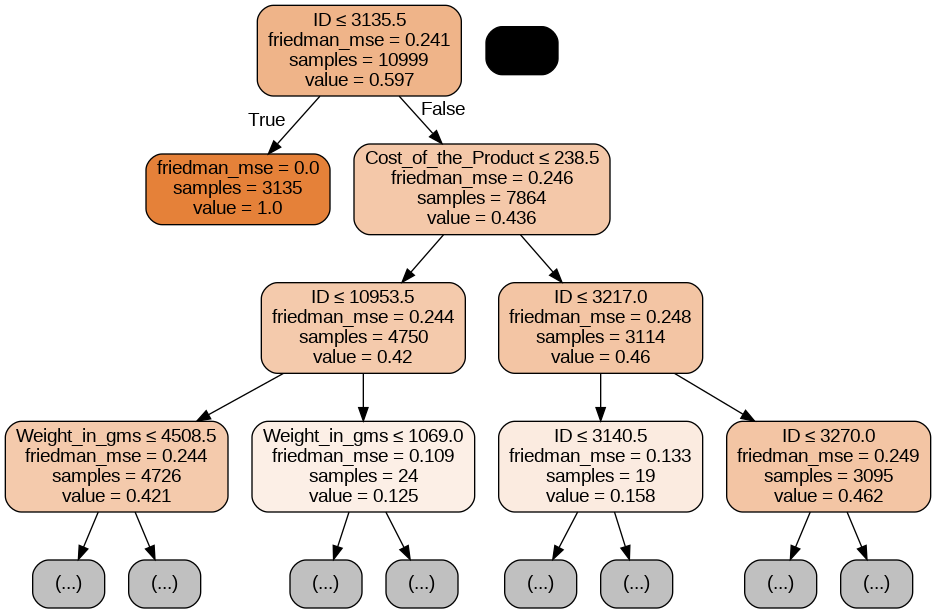

In [10]:
from IPython.utils.capture import StringIO
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, max_depth=3,
               filled=True, rounded=True, feature_names=X.columns,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [11]:
pred = clf.predict(X)
pred

array([1.        , 1.        , 1.        , ..., 0.57317073, 0.28571429,
       0.        ])